In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "email-phishing-dataset"

# **Table of Contents**
------------------------
1. **✅ Load Libraries**
2. **✅ Import Data & EDA**
3. **✅ Data Transfromation**
4. **✅ Data Visualization**
5. **✅ ML Modeling & Prediction**

# **1. Load Libraries**
--------------------------

In [2]:
library(tidyverse)
library(tidymodels)
library(psych)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(ggcorrplot)
library(GGally)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──



✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.4.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     



── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages




Attaching package: ‘psych’




The following objects are masked from ‘package:scales’:

    alpha, rescale




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha





Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine




Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



# **2. Import Data & EDA**
------------

In [3]:
df <- read.csv('/kaggle/input/email-phishing-dataset/email_phishing_data.csv') %>% janitor::clean_names()

## **Data Description**
---------------------------------
* **num_words** - Total number of words in the email body.
* **num_unique_words**- Count of unique words used.
* **num_stopwords** - Count of common stopwords (e.g., "the", "and", "in").
* **num_links** - Number of hyperlinks detected.
* **num_unique_domains** - Number of unique domains in links (e.g., "paypal.com").
* **num_email_addresses** - Count of email addresses found in the text.
* **num_spelling_errors** - Count of misspelled words.
* **num_urgent_keywords** - Number of urgent words (e.g., "urgent", "verify", "update").
* **label** - Target variable: 0 = Safe Email, 1 = Phishing Email.


**This dataset is designed for phishing email detection using machine learning. It combines:**

~500,000 non-phishing ("safe") emails from the Enron Email Dataset.   
~20,000 phishing and safe emails from the Phishing Email Dataset.   
Every email was cleaned and passed through a custom NLP feature extraction pipeline that focuses on phishing indicators.   
The goal is to provide a ready-to-use dataset for classification tasks with minimal preprocessing.

## **Summary**

In [4]:
glimpse(df)

Rows: 524,846
Columns: 9
$ num_words           <int> 140, 5, 34, 6, 9, 37, 4, 22, 289, 32, 50, 923, 923…
$ num_unique_words    <int> 94, 5, 32, 6, 9, 29, 4, 21, 176, 30, 32, 355, 355,…
$ num_stopwords       <int> 52, 1, 15, 2, 2, 5, 1, 4, 66, 9, 19, 309, 309, 7, …
$ num_links           <int> 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ num_unique_domains  <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ num_email_addresses <int> 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,…
$ num_spelling_errors <int> 0, 0, 0, 0, 0, 7, 0, 7, 28, 2, 2, 51, 51, 0, 0, 39…
$ num_urgent_keywords <int> 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,…
$ label               <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


In [5]:
summary(df)

   num_words         num_unique_words num_stopwords      num_links       
 Min.   :      0.0   Min.   :    0    Min.   :     0   Min.   :  0.0000  
 1st Qu.:     47.0   1st Qu.:   38    1st Qu.:    12   1st Qu.:  0.0000  
 Median :    120.0   Median :   79    Median :    34   Median :  0.0000  
 Mean   :    276.2   Mean   :  123    Mean   :    80   Mean   :  0.8956  
 3rd Qu.:    269.0   3rd Qu.:  145    3rd Qu.:    79   3rd Qu.:  0.0000  
 Max.   :2339682.0   Max.   :51251    Max.   :720411   Max.   :824.0000  
 num_unique_domains num_email_addresses num_spelling_errors num_urgent_keywords
 Min.   :  0.0000   Min.   :   0.000    Min.   :     0.00   Min.   :0.0000     
 1st Qu.:  0.0000   1st Qu.:   0.000    1st Qu.:     2.00   1st Qu.:0.0000     
 Median :  0.0000   Median :   0.000    Median :     8.00   Median :0.0000     
 Mean   :  0.3478   Mean   :   2.115    Mean   :    24.69   Mean   :0.2453     
 3rd Qu.:  0.0000   3rd Qu.:   1.000    3rd Qu.:    22.00   3rd Qu.:0.0000     
 M

In [6]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
num_words,1,524846,276.22800021,3335.4567503,120,159.33551651,130.4688,0,2339682,2339682,657.790121,461075.13818,4.6040429653
num_unique_words,2,524846,123.01216738,201.6264777,79,91.88114881,71.1648,0,51251,51251,40.573545,8137.84062,0.2783117982
num_stopwords,3,524846,80.04546476,1023.3303803,34,46.11123707,38.5476,0,720411,720411,664.821099,467769.99517,1.4125372899
num_links,4,524846,0.89558842,5.6030006,0,0.09749975,0.0000,0,824,824,22.621912,1394.26318,0.0077340099
num_unique_domains,5,524846,0.34776677,1.7742089,0,0.09749975,0.0000,0,524,524,70.274375,15333.42816,0.0024490002
num_email_addresses,6,524846,2.11489656,13.5926815,0,0.45225280,0.0000,0,1150,1150,29.042103,1298.19839,0.0187624348
num_spelling_errors,7,524846,24.69473141,311.3123583,8,12.55096480,10.3782,0,190104,190104,485.376815,276681.60937,0.4297149028
num_urgent_keywords,8,524846,0.24530053,0.5593198,0,0.12034210,0.0000,0,7,7,2.844194,10.69516,0.0007720479
label,9,524846,0.01324007,0.1143014,0,0.00000000,0.0000,0,1,1,8.517117,70.54141,0.0001577740


In [7]:
df_skim <- skimr::skim(df)
print(df_skim)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             524846
Number of columns          9     
_______________________          
Column type frequency:           
  numeric                  9     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable       n_missing complete_rate     mean       sd p0 p25 p50 p75
1 num_words                   0             1 276.     3335.     0  47 120 269
2 num_unique_words            0             1 123.      202.     0  38  79 145
3 num_stopwords               0             1  80.0    1023.     0  12  34  79
4 num_links                   0             1   0.896     5.60   0   0   0   0
5 num_unique_domains          0             1   0.348     1.77   0   0   0   0
6 num_email_addresses         0             1   2.11     13.6    0   0   0   1
7 num_spelling_err

## **Checking Missing Value & Duplicate Value**

In [8]:
na <- data.frame(Na_Count = colSums(is.na(df)))
na

,Na_Count
,<dbl>
num_words,0
num_unique_words,0
num_stopwords,0
num_links,0
num_unique_domains,0
num_email_addresses,0
num_spelling_errors,0
num_urgent_keywords,0
label,0


In [9]:
sum(duplicated(df))

[1] 319794

In [10]:
head(df)

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,140,94,52,0,0,0,0,0,0
2,5,5,1,0,0,0,0,0,0
3,34,32,15,0,0,0,0,0,0
4,6,6,2,0,0,0,0,0,0
5,9,9,2,0,0,0,0,0,0
6,37,29,5,0,0,3,7,1,0


In [11]:
tail(df)

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
524841,65,52,22,2,2,0,6,1,0
524842,782,327,301,2,2,2,52,1,0
524843,36,30,11,0,0,0,4,0,1
524844,61,46,11,0,0,0,3,0,0
524845,213,136,89,0,0,0,18,0,0
524846,26,24,3,0,0,0,2,0,0


# **3. Data Transformation**

In [12]:
# Data Type Conversion (Target Variables Int -> Factor)

df$label <- as.factor(df$label)

# **4. Data Visualzation**

In [13]:
num_cols <- df %>% select(where(is.numeric)) %>% colnames()
cat_cols <- df %>% select(where(is.factor)) %>% colnames()
cat('num_cols :', num_cols,'\n')
cat('cat_cols :', cat_cols)

num_cols : num_words num_unique_words num_stopwords num_links num_unique_domains num_email_addresses num_spelling_errors num_urgent_keywords 


cat_cols : label

## **Histogram & Boxplot & Densityplot**

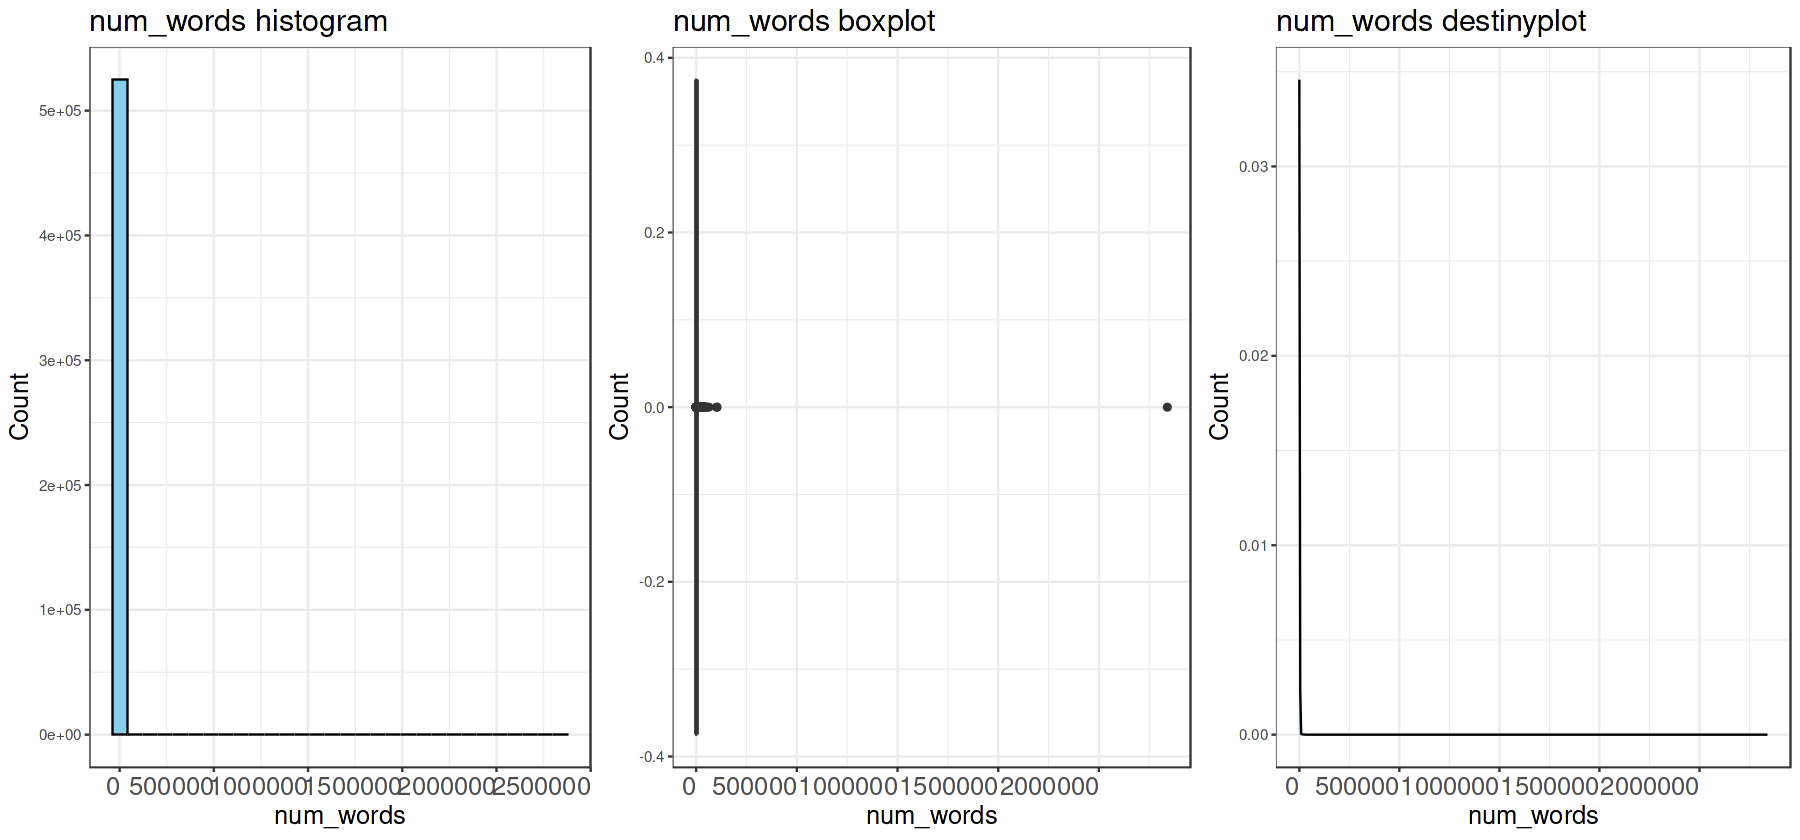

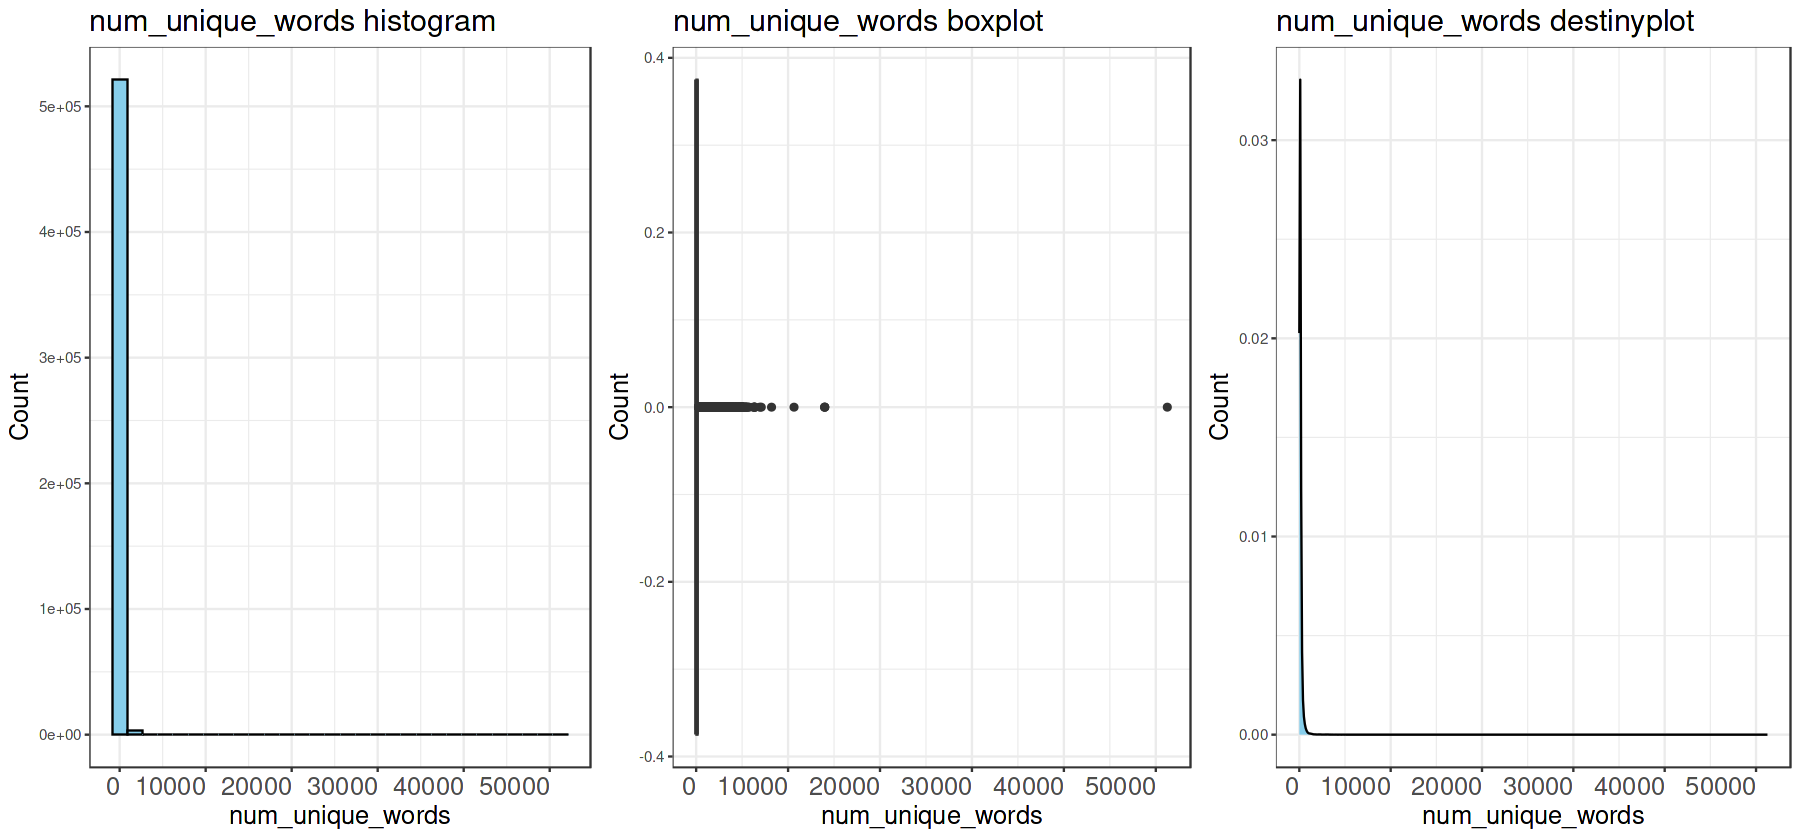

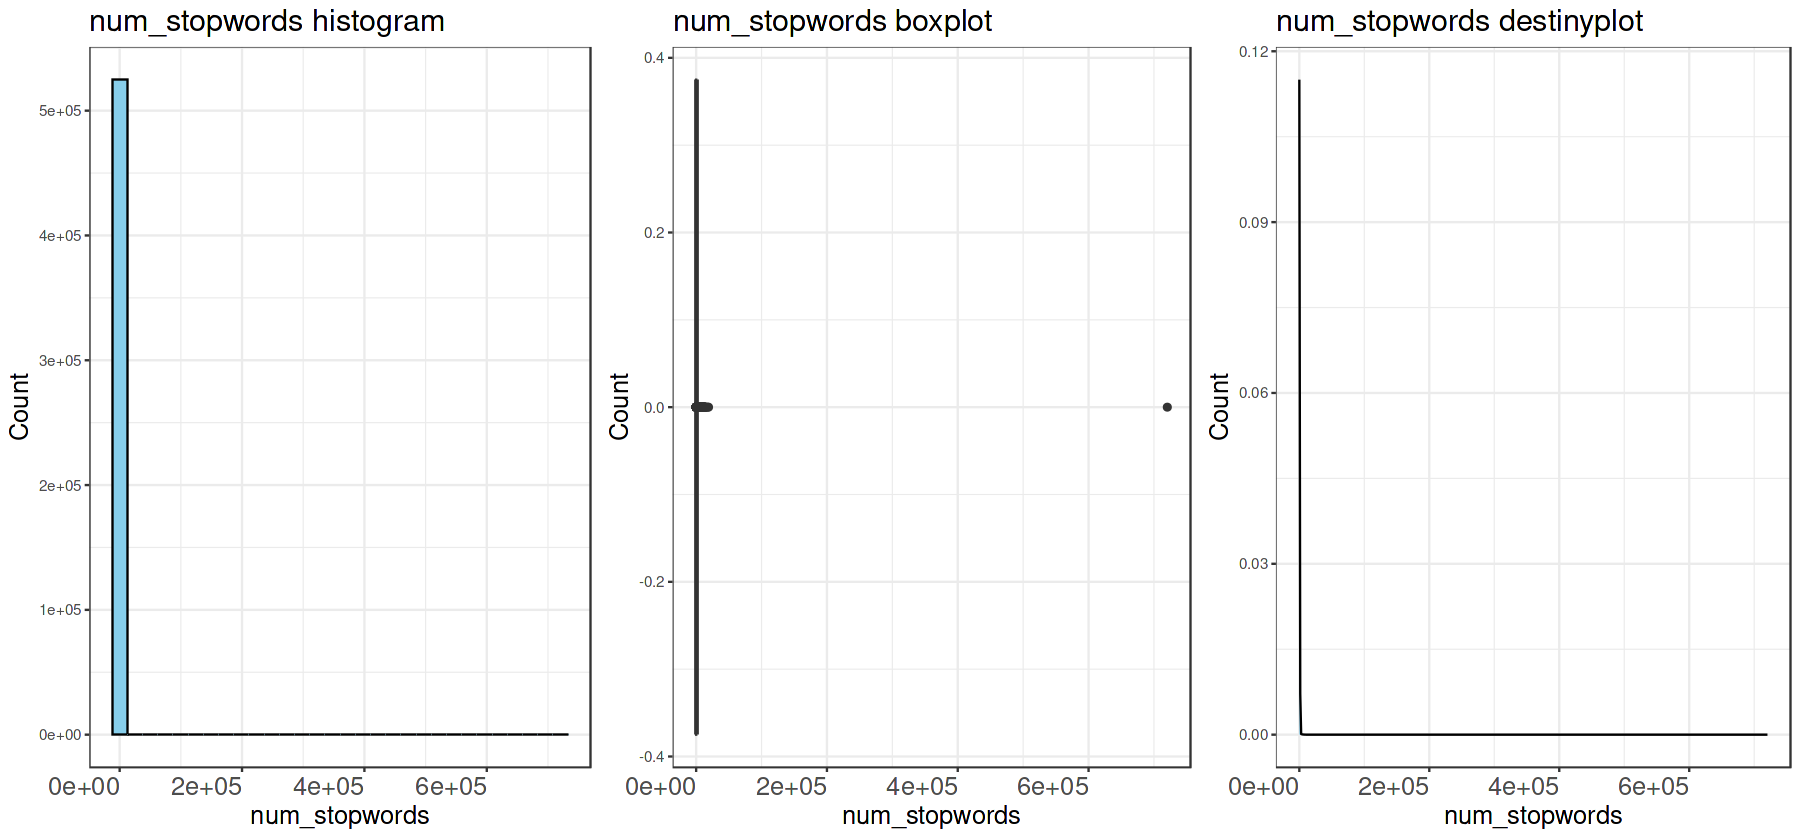

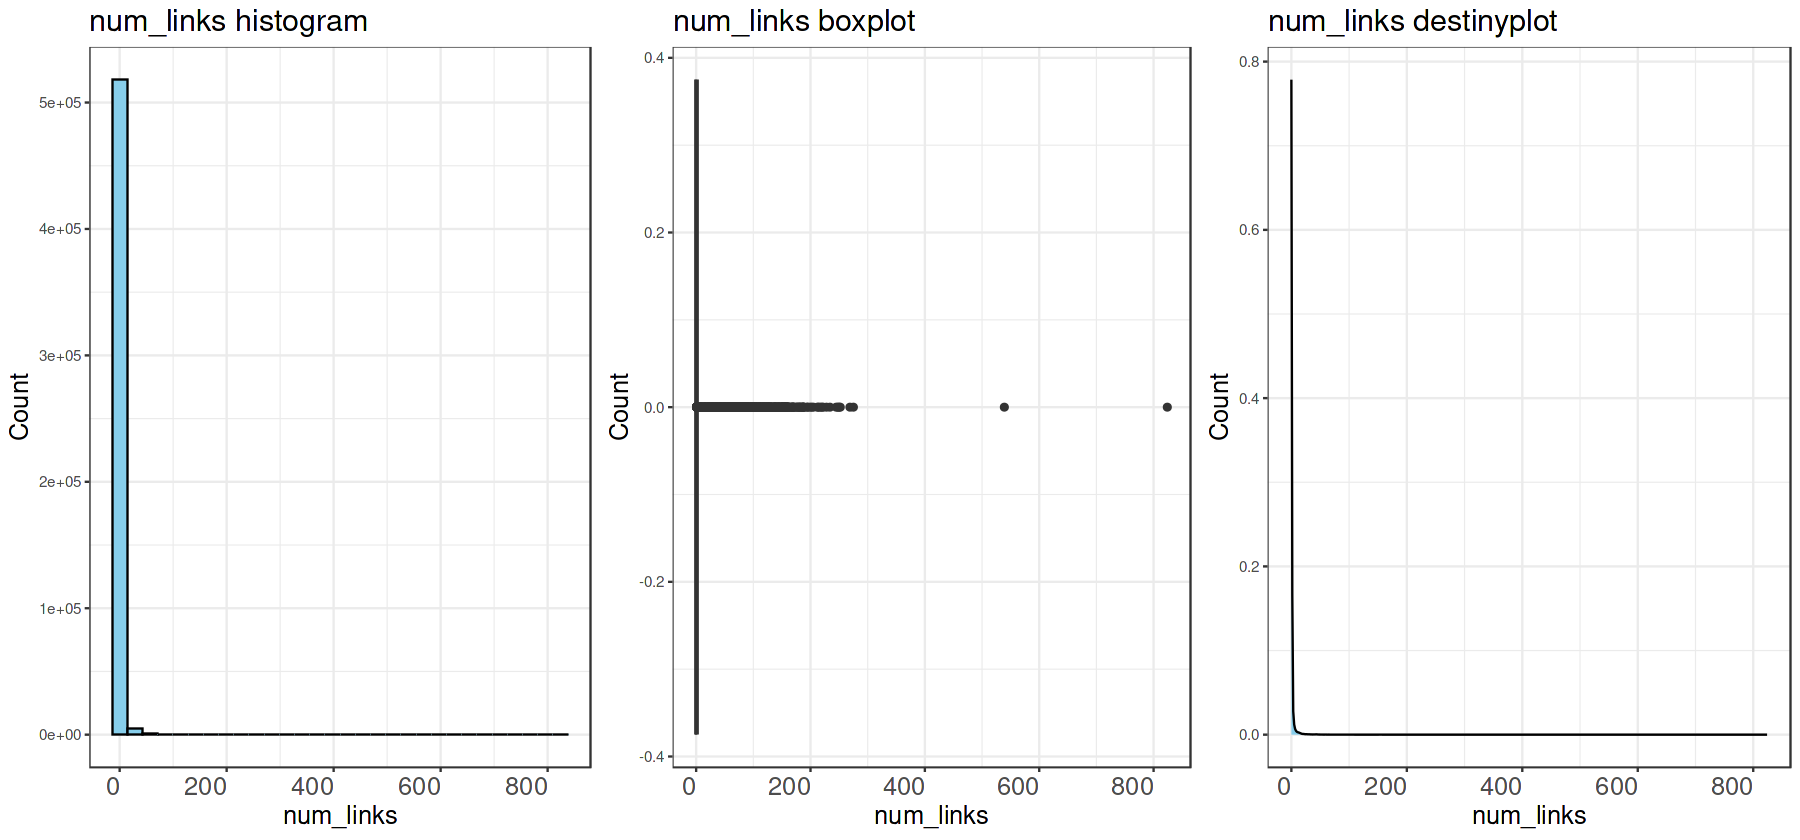

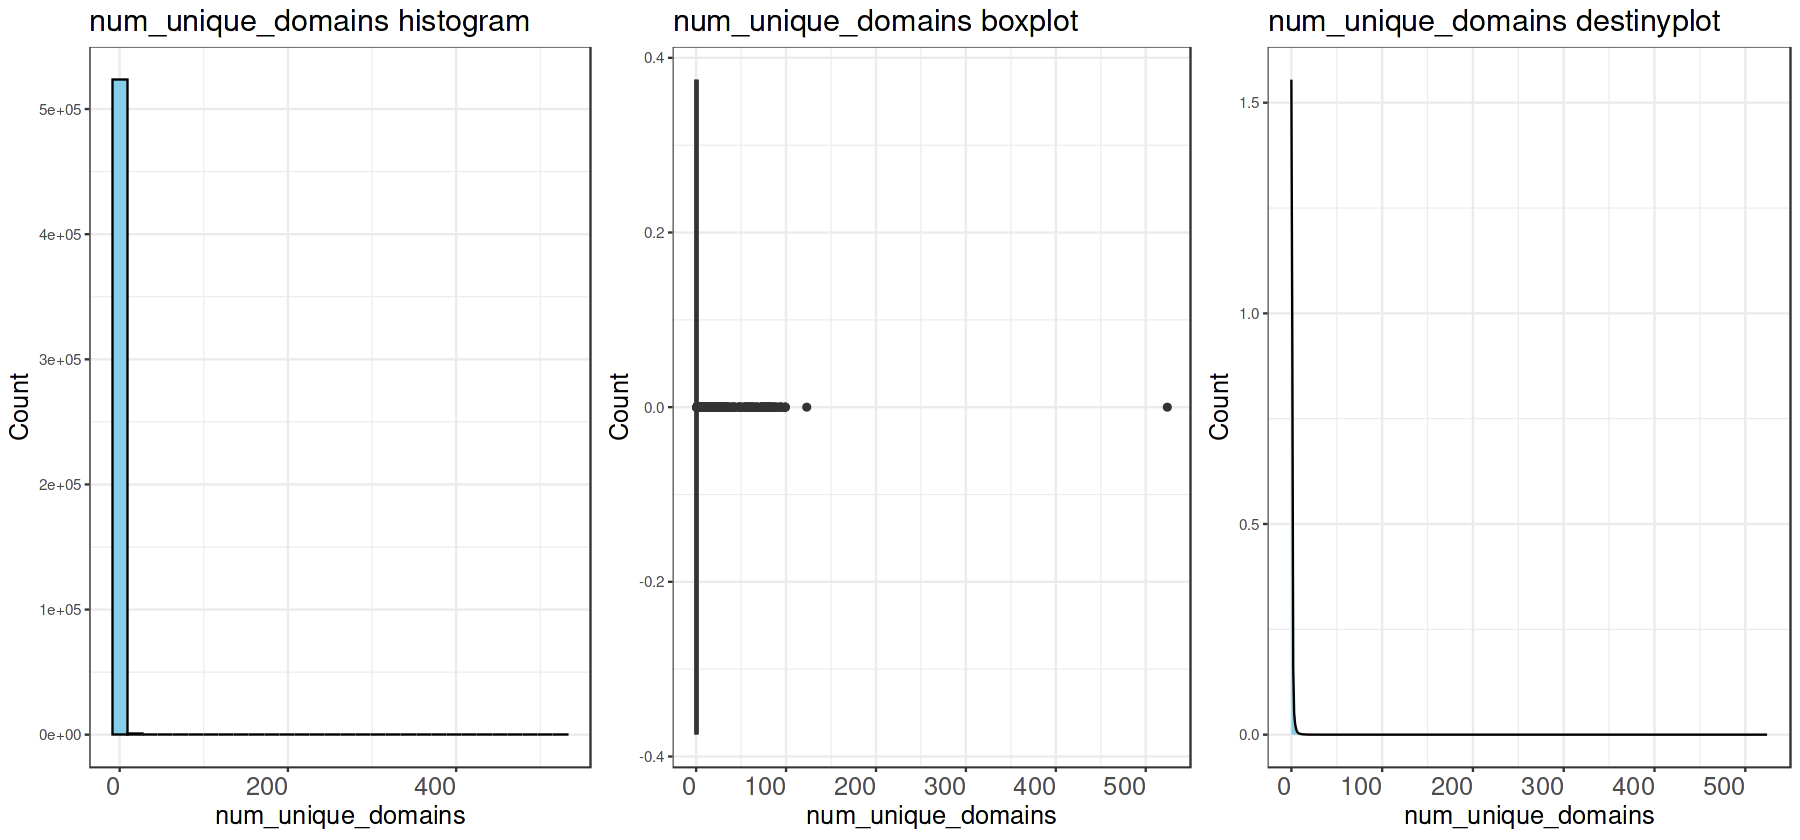

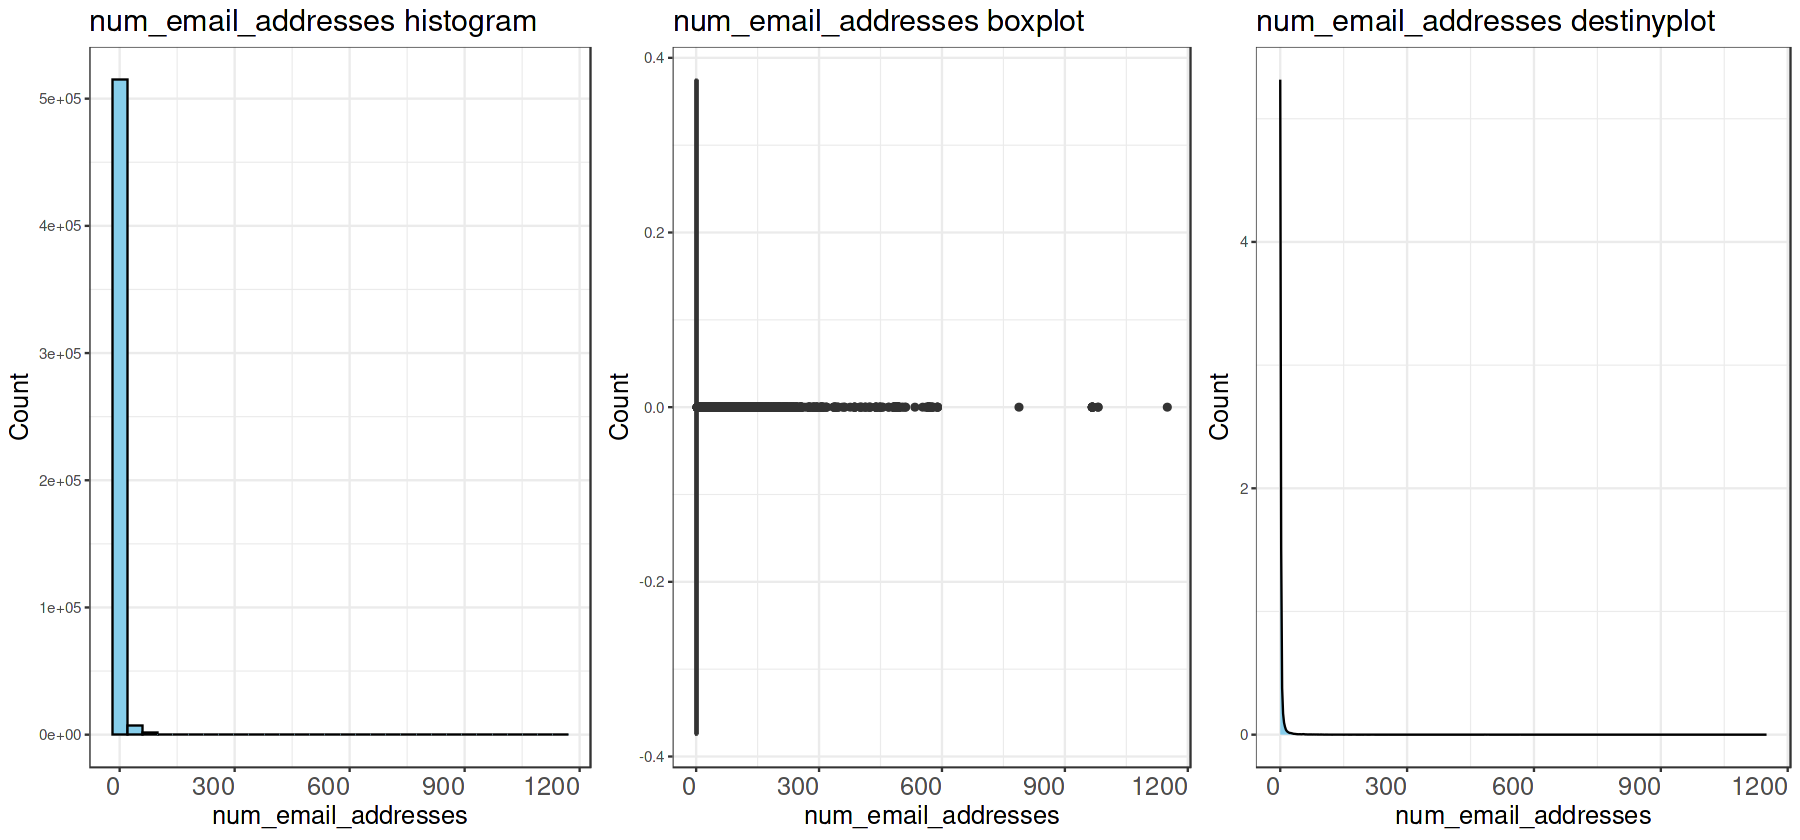

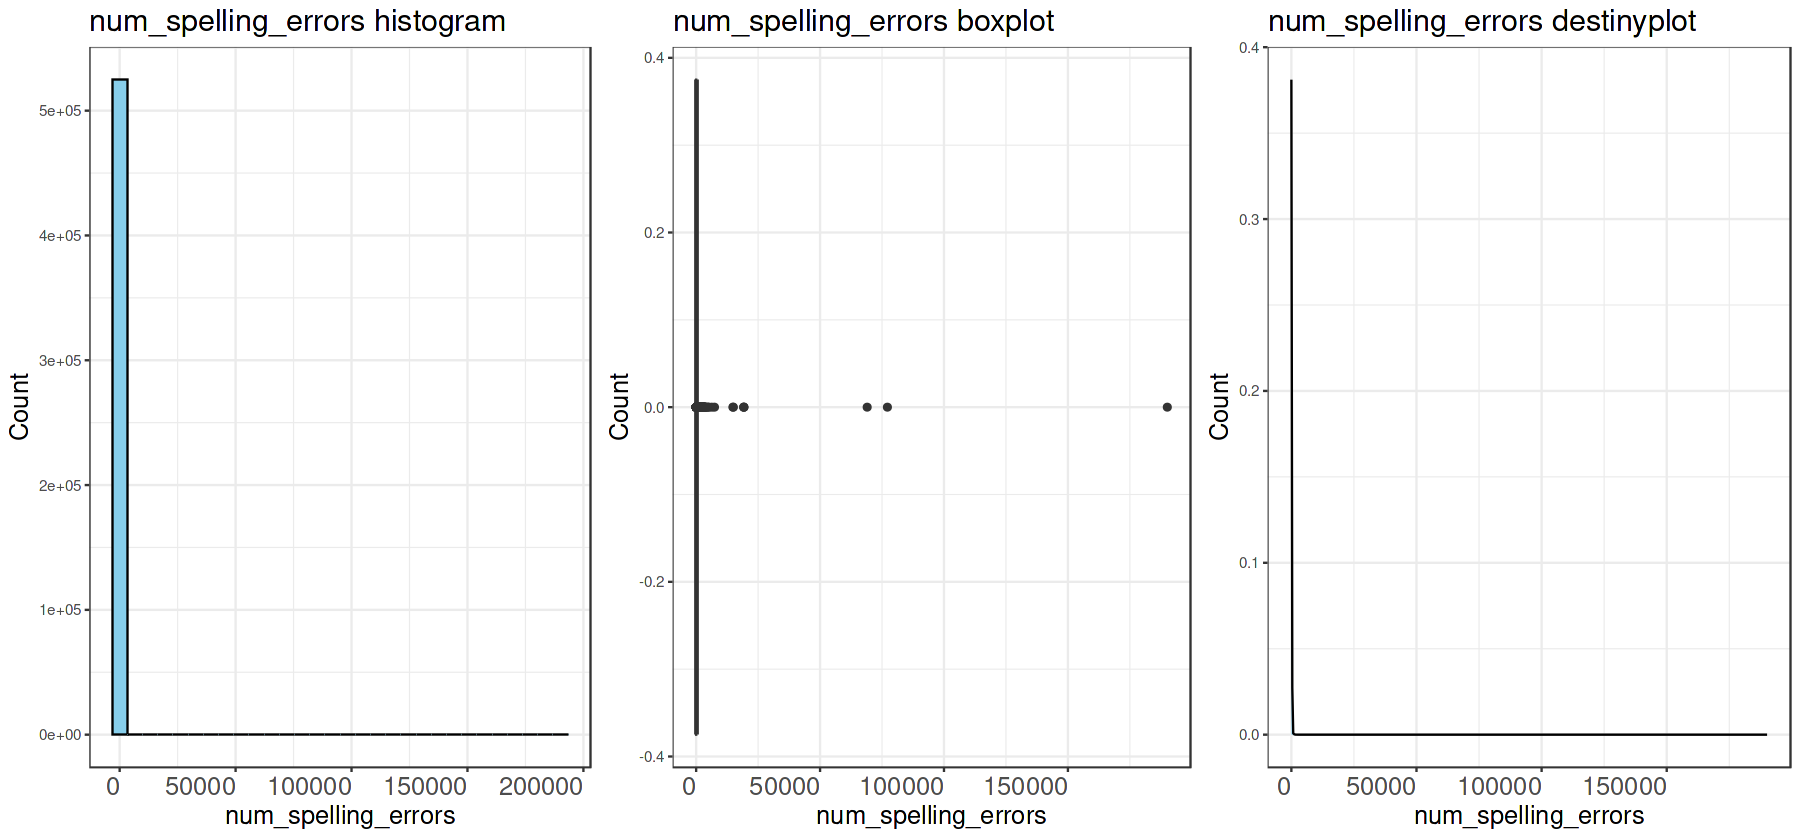

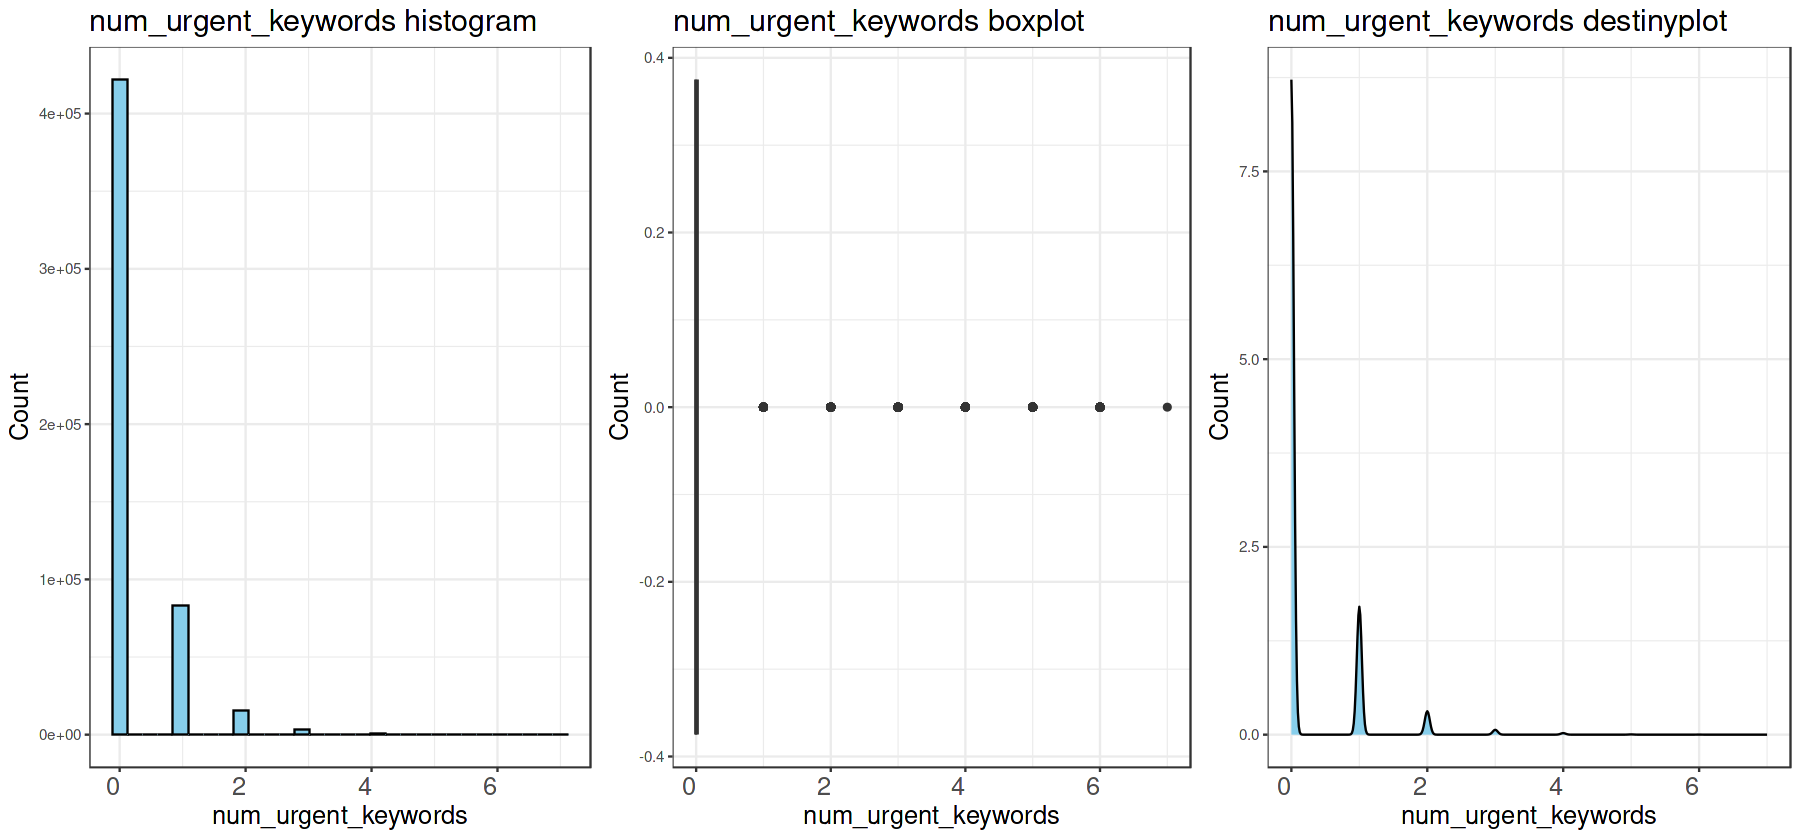

In [14]:
options(repr.plot.width = 15.0, repr.plot.height = 7.0)

for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b ,c, ncol = 3)    
}

## **CountPlot**

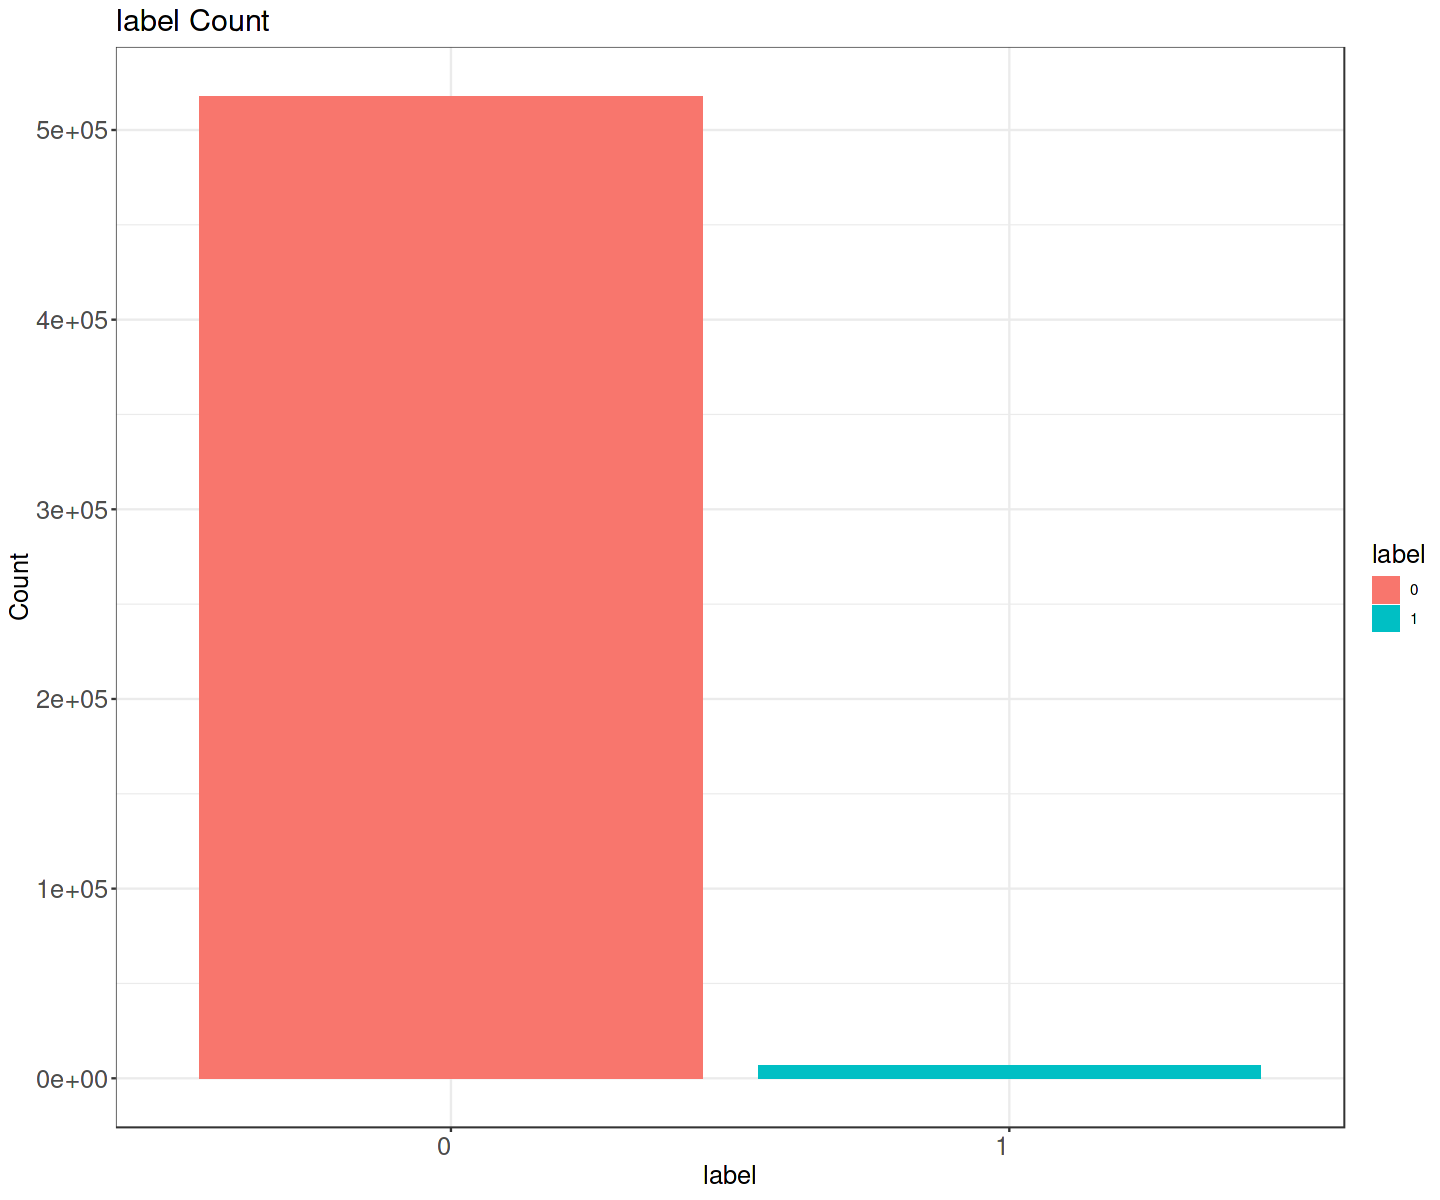

In [15]:
options(repr.plot.width = 12.0, repr.plot.height = 10.0)

ggplot(df) + geom_bar(aes(x = label, fill = label)) + 
            labs(title = 'label Count', y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            axis.text.y = element_text(size = 15, hjust=1)      ,
            title = element_text(size=15)
            )

## **Correlation**

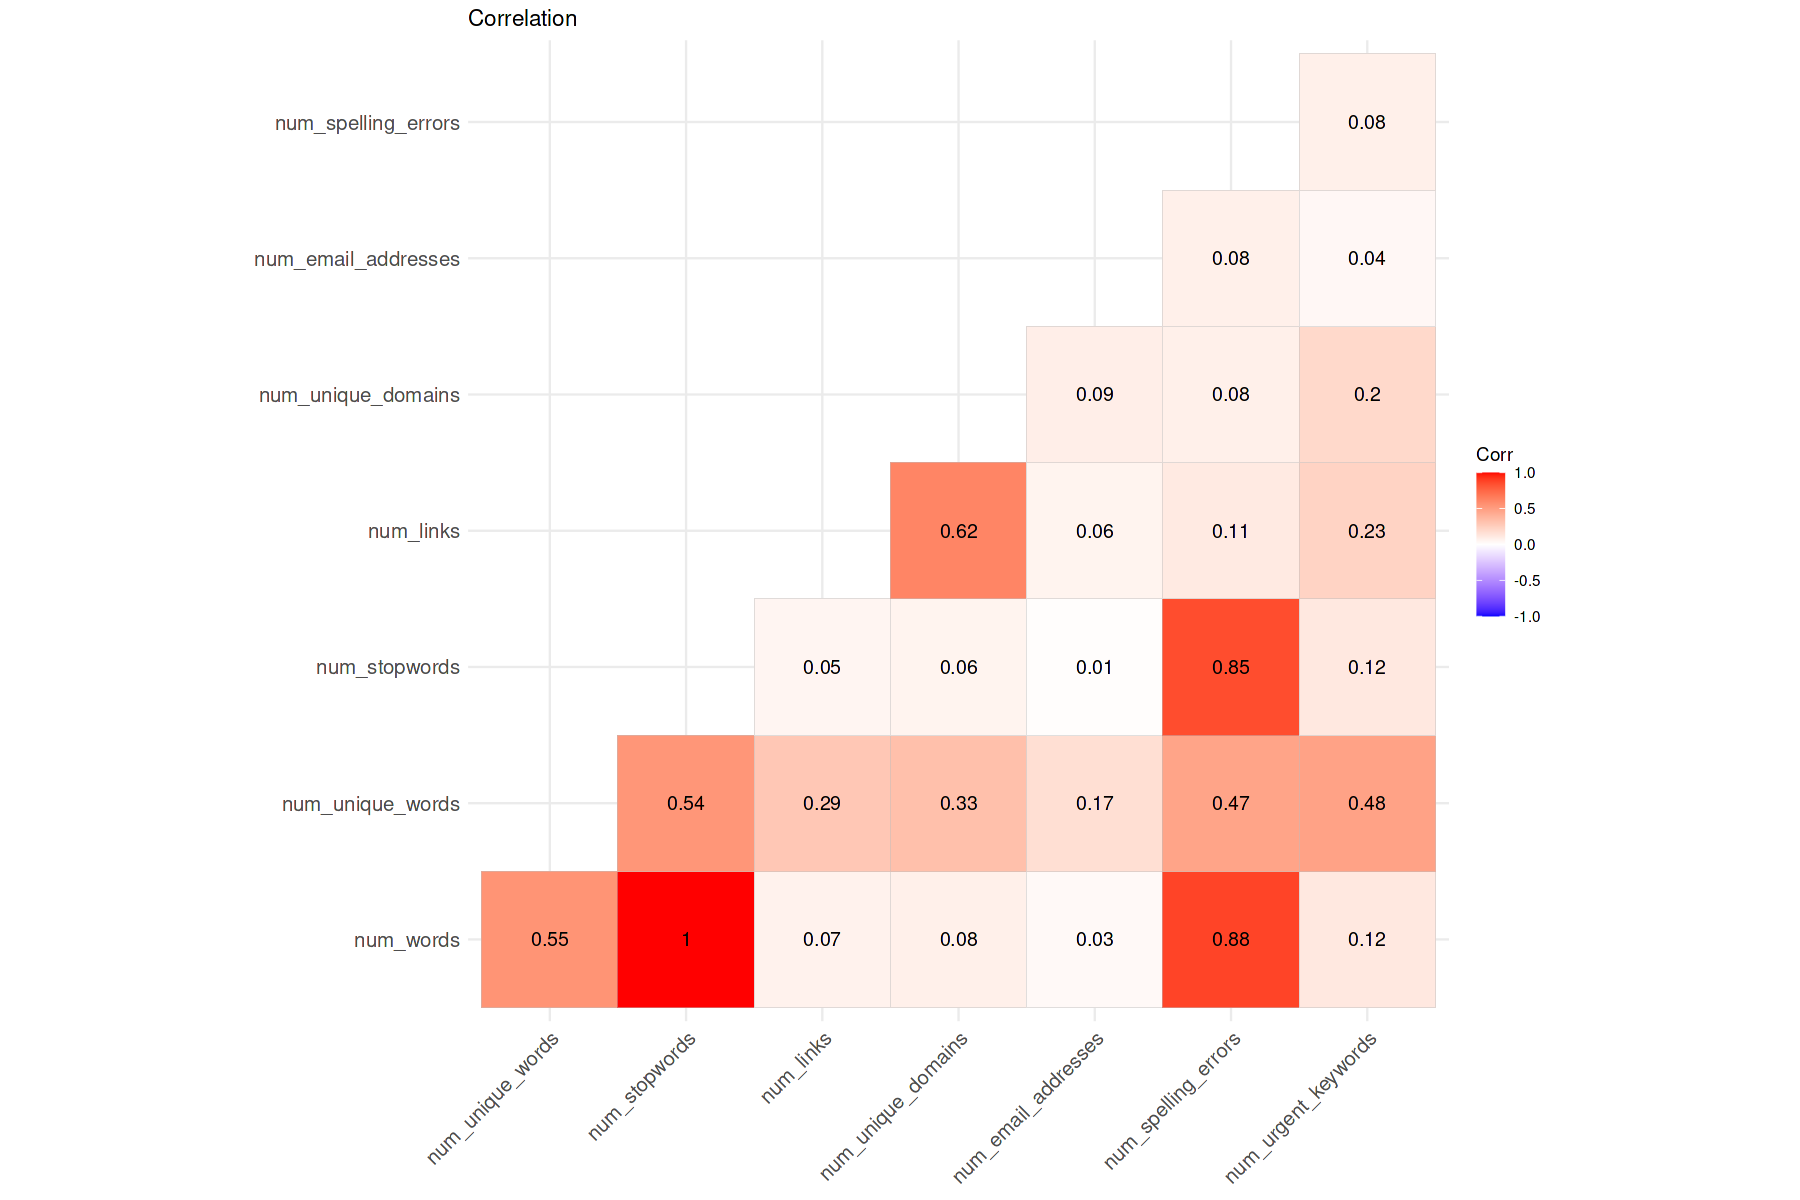

In [16]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

**Num_words have a strong positive correlation with num_unique_words, num_stopwords, and num_spelling_errors**

# **4. Modeling**

In [17]:
library(caret)
library(Metrics)

Loading required package: lattice




Attaching package: ‘caret’




The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity




The following object is masked from ‘package:purrr’:

    lift




The following object is masked from ‘package:httr’:

    progress





Attaching package: ‘Metrics’




The following objects are masked from ‘package:caret’:

    precision, recall




The following objects are masked from ‘package:yardstick’:

    accuracy, mae, mape, mase, precision, recall, rmse, smape




## **Model to use**
1. **LogisticRegression**
2. **eXtreme boost**

## **SMOTE(Over Sampling)**

In [18]:
head(df)

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,140,94,52,0,0,0,0,0,0
2,5,5,1,0,0,0,0,0,0
3,34,32,15,0,0,0,0,0,0
4,6,6,2,0,0,0,0,0,0
5,9,9,2,0,0,0,0,0,0
6,37,29,5,0,0,3,7,1,0


## **Train Test Split**

In [19]:
library(smotefamily)

smote_result <- SMOTE(X = df[, -9], target = df$label, 
                      K = 5, dup_size = 5)

In [20]:
df_smote <- data.frame(smote_result$data)
names(df_smote)[ncol(df_smote)] <- "label"
df_smote$label <- as.factor(df_smote$label)

table(df_smote$label)


     0      1 
517897  41694 

In [21]:
split <- rsample::initial_split(df_smote, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **Recipe**

In [22]:
rec <- recipe(label ~ ., data = train) %>%
    recipes::step_dummy(all_nominal_predictors()) %>% 
    recipes::step_normalize(all_numeric_predictors()) %>%
    recipes::step_zv(all_predictors()) %>% 
    recipes::step_corr(all_predictors(), threshold = 0.8)

## **5-FOLD**

In [23]:
set.seed(123)
folds <- 
    train %>%
    rsample::vfold_cv(v = 5, strata = label)

## **LogisticRegression**

In [24]:
#Logistic Regression Model
glm_model <- multinom_reg() %>%
    set_engine("nnet") %>%
    set_mode("classification")

glm_wf <- workflow() %>% 
  add_recipe(rec) %>% 
  add_model(glm_model)

#Fit
glm_fit <- glm_wf %>% 
  fit(data = train)

#pred
glm_pred <- glm_fit %>% predict(new_data = test)

In [25]:
glm_cm <- confusionMatrix(glm_pred$.pred_class, test$label)
glm_cm

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 103543   8365
         1     11      0
                                          
               Accuracy : 0.9252          
                 95% CI : (0.9236, 0.9267)
    No Information Rate : 0.9253          
    P-Value [Acc > NIR] : 0.5526          
                                          
                  Kappa : -2e-04          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9999          
            Specificity : 0.0000          
         Pos Pred Value : 0.9253          
         Neg Pred Value : 0.0000          
             Prevalence : 0.9253          
         Detection Rate : 0.9252          
   Detection Prevalence : 0.9999          
      Balanced Accuracy : 0.4999          
                                          
       'Positive' Class : 0               
            

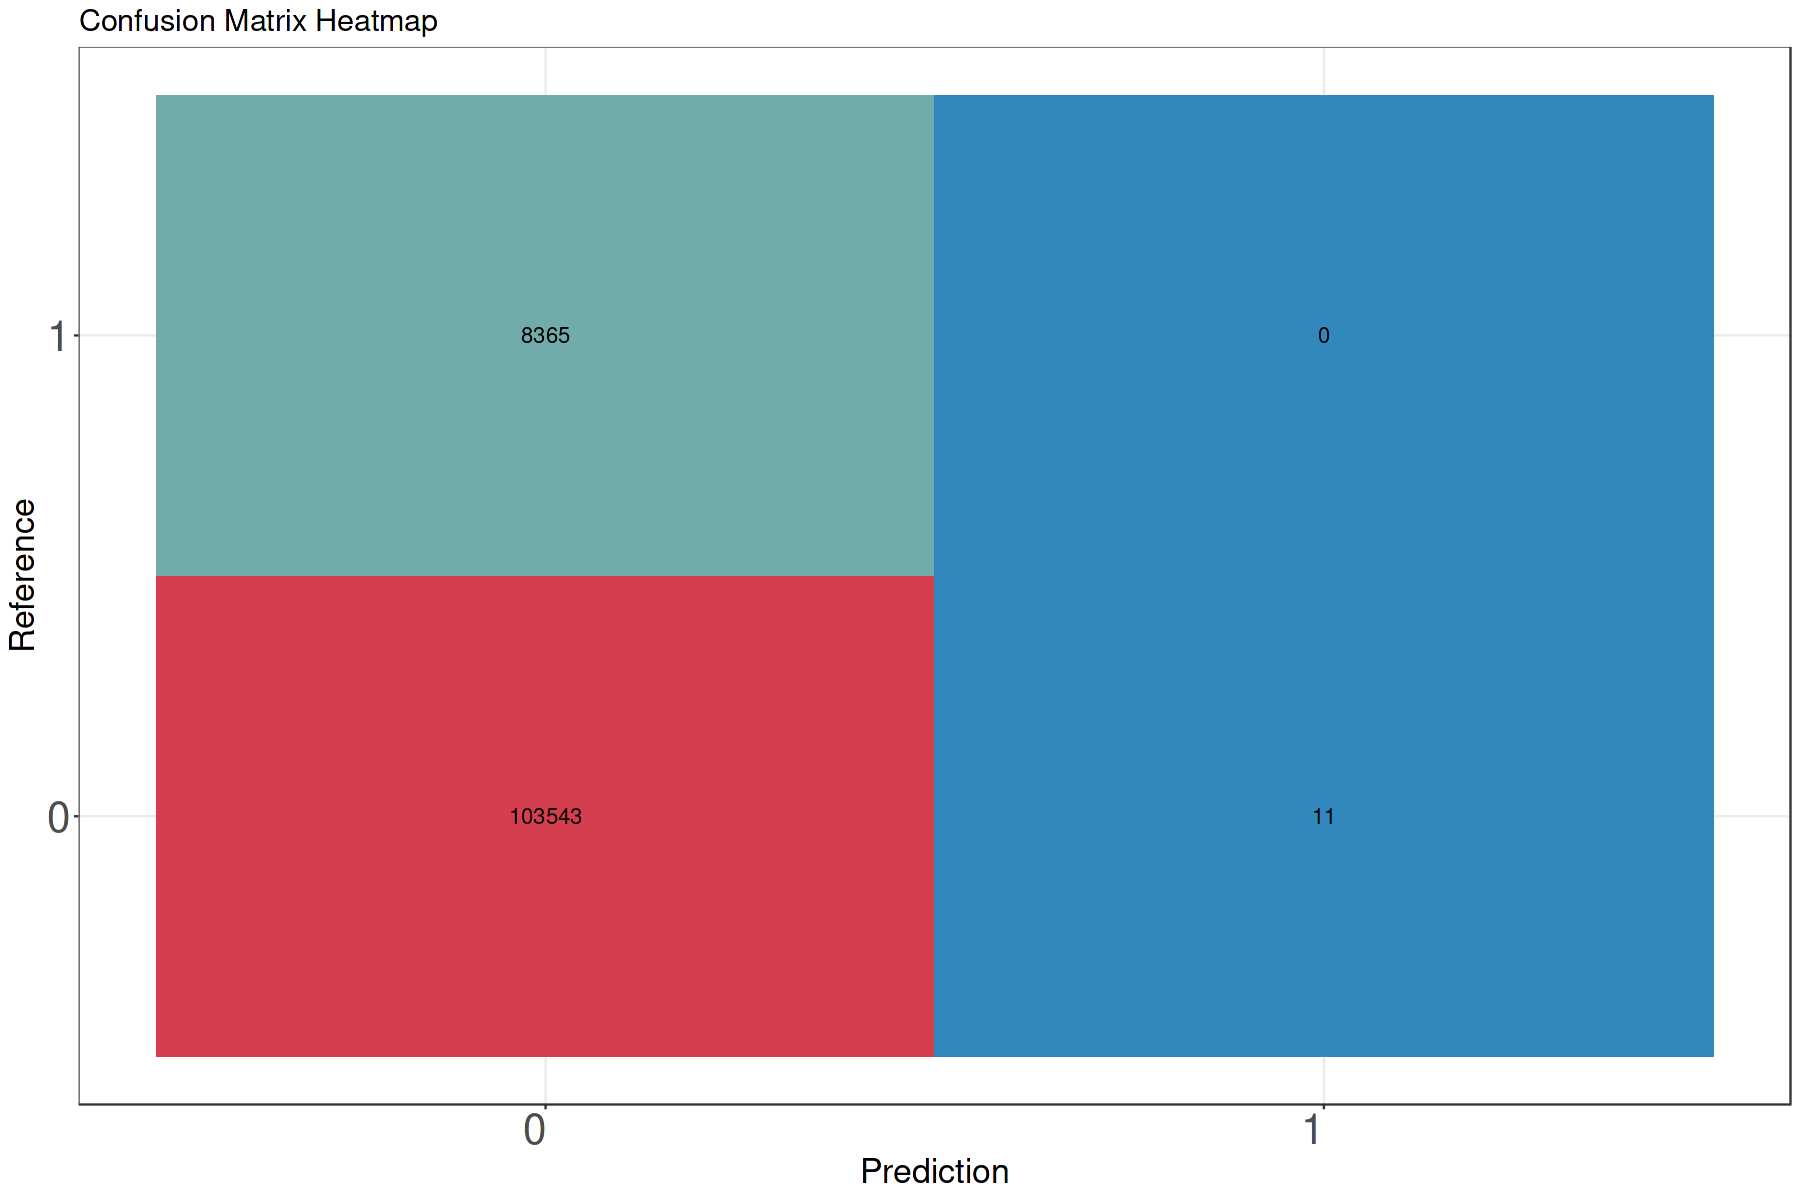

In [26]:
#HeatMap
glm_heatmap <- data.frame(glm_cm$table)

ggplot(glm_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 50), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 25, hjust=1),
                axis.text.y = element_text(size = 25, hjust=1),
                title = element_text(size=15)
                )

## **XGB**

In [27]:
#simple xgb
#eXtreme Gradient Boost Model

xgb_spec <-boost_tree() %>%
  set_engine(engine = "xgboost", 
             nthread  = future::availableCores()) %>%
  set_mode(mode = "classification")

xgb_wf <- workflow() %>%
  add_recipe(rec) %>%
  add_model(xgb_spec)

#Fit
xgb_fit <- xgb_wf %>% 
  fit(data = train)

#pred
xgb_pred <- xgb_fit %>% predict(new_data = test)

In [28]:
xgb_cm <- confusionMatrix(xgb_pred$.pred_class, test$label)
xgb_cm

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 103546   4518
         1      8   3847
                                          
               Accuracy : 0.9596          
                 95% CI : (0.9584, 0.9607)
    No Information Rate : 0.9253          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6113          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9999          
            Specificity : 0.4599          
         Pos Pred Value : 0.9582          
         Neg Pred Value : 0.9979          
             Prevalence : 0.9253          
         Detection Rate : 0.9252          
   Detection Prevalence : 0.9656          
      Balanced Accuracy : 0.7299          
                                          
       'Positive' Class : 0               
            

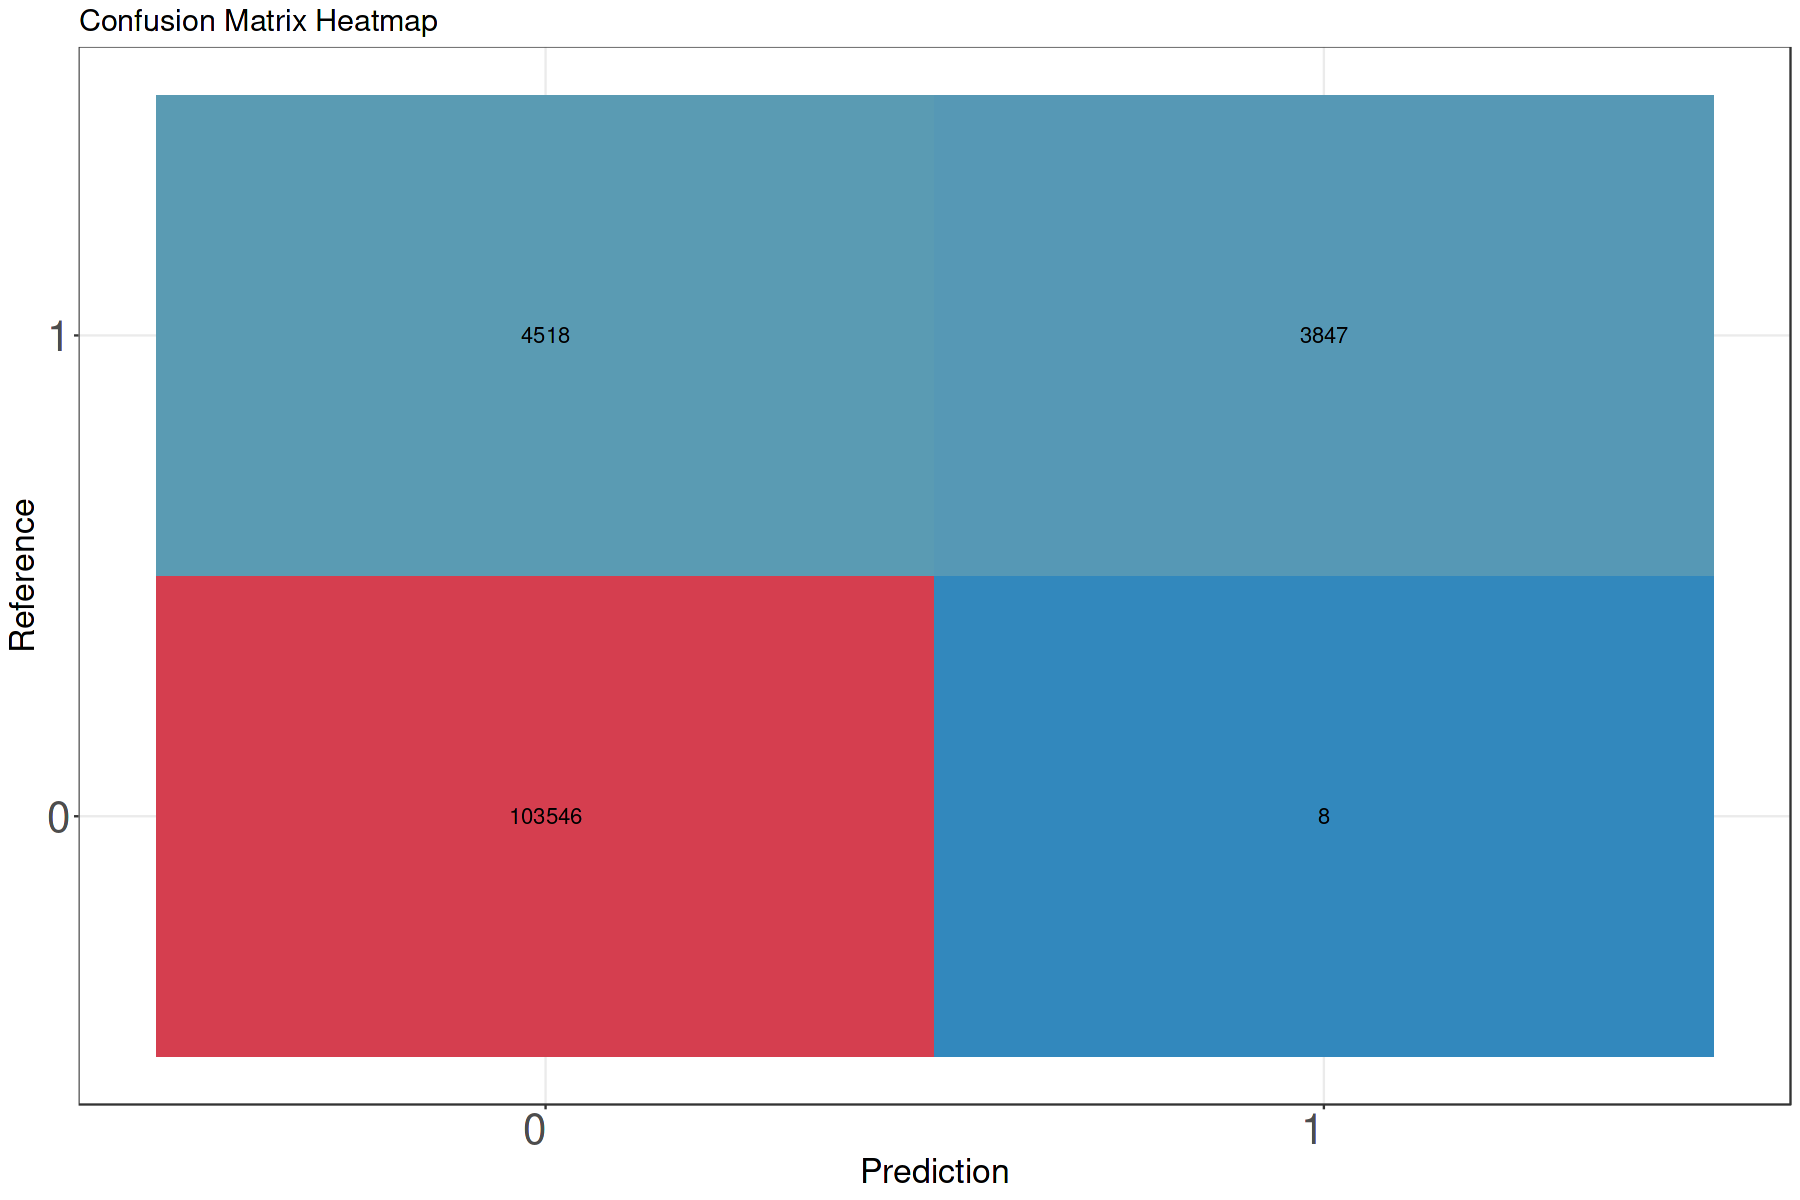

In [29]:
#HeatMap
xgb_heatmap <- data.frame(xgb_cm$table)

ggplot(xgb_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 50), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 25, hjust=1),
                axis.text.y = element_text(size = 25, hjust=1),
                title = element_text(size=15)
                )

## **Model Comparison**

In [30]:
acc <- data.frame(model = c('Logistic','XGB') , Accuracy = c(glm_cm$overall[1], xgb_cm$overall[1]))
acc

model,Accuracy
<chr>,<dbl>
Logistic,0.9251602
XGB,0.9595600


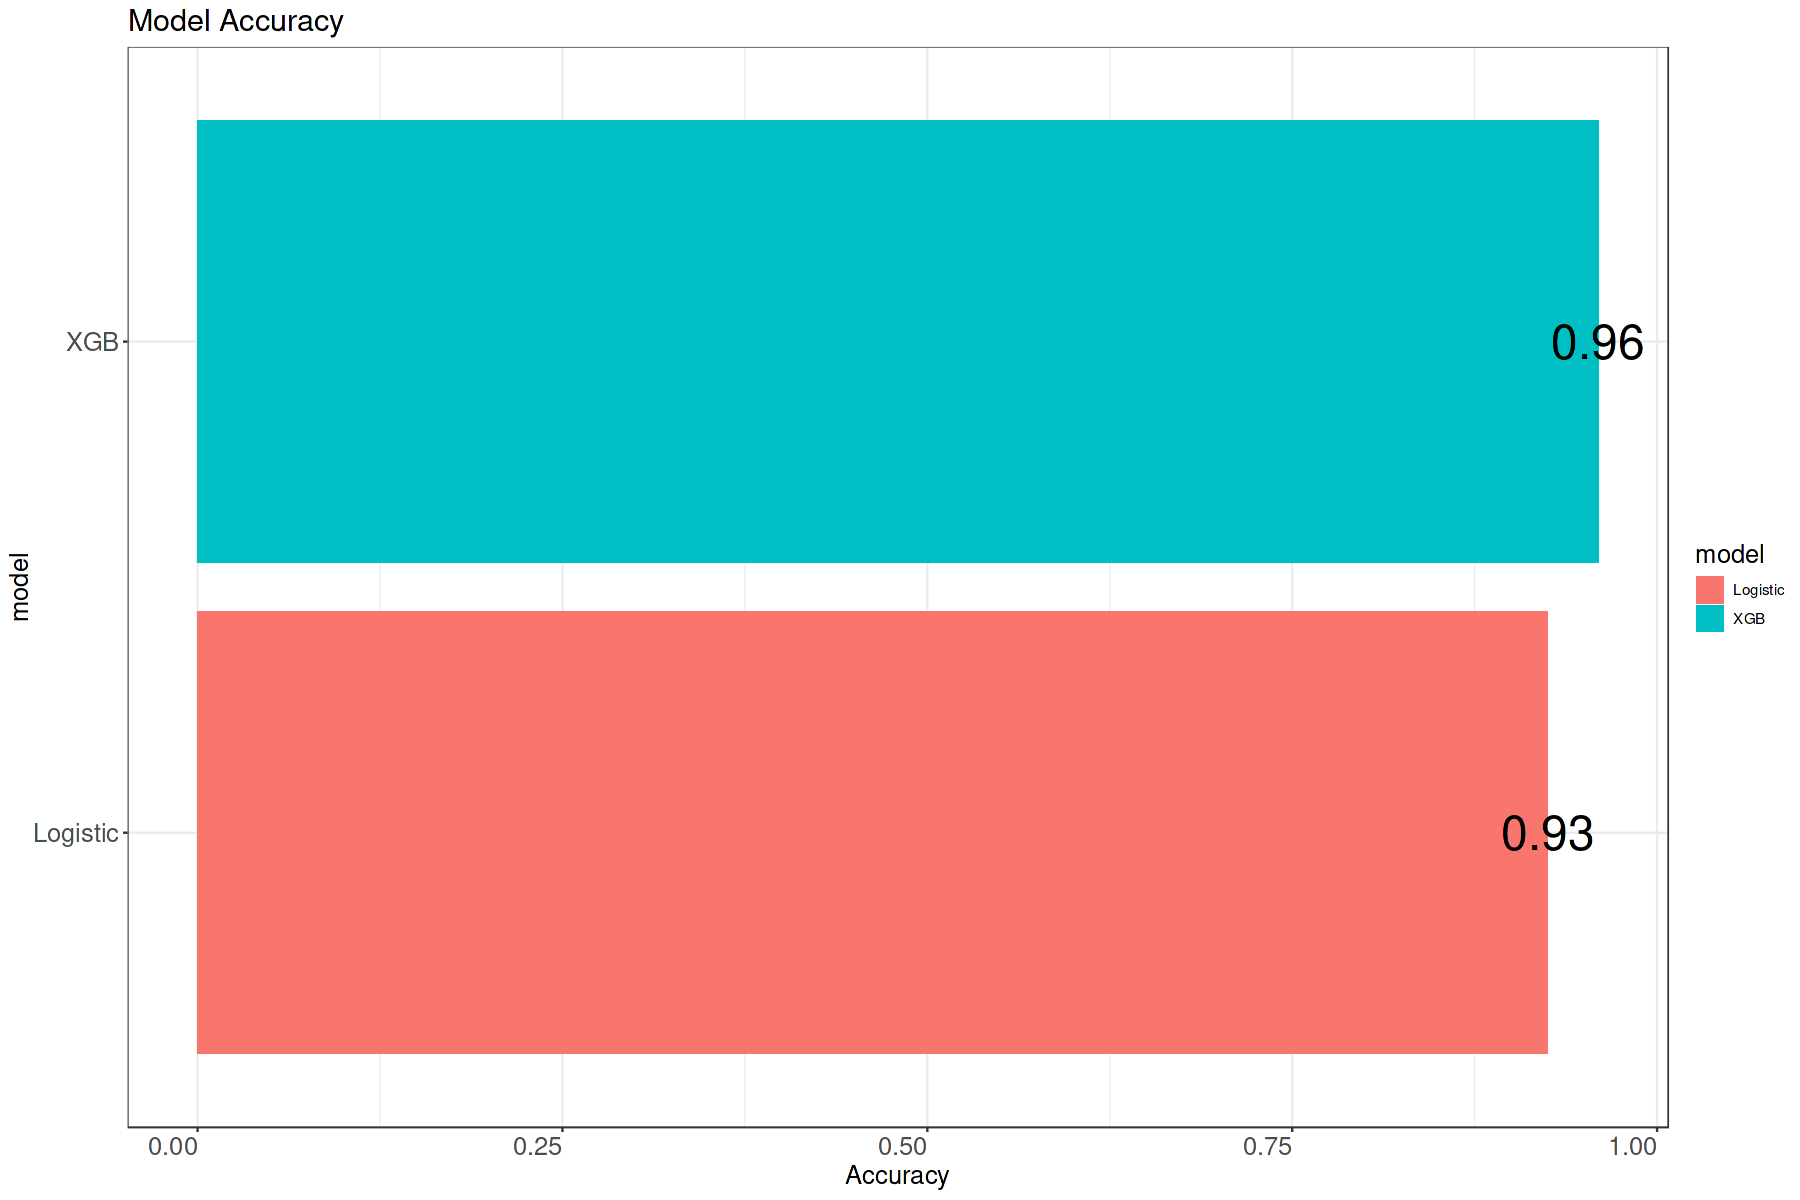

In [31]:
ggplot(acc) + geom_col(aes(y=model , x= Accuracy , fill = model)) +
    geom_text(aes(y = model , x= Accuracy, label= round(Accuracy,2)), hjust=0.5, size = 10) +
    theme_bw() +
    ggtitle('Model Accuracy') + 
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15),
    title = element_text(size=15)
    )

### **XGB is the best models.**
--------------------------------------
**Thankyou. Please leave your advice in the comments.**